In [1]:
pip install Graphviz


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Setting random seed.
seed = 10

In [5]:
from sklearn import datasets
breast_cancer = datasets.load_breast_cancer()
df=pd.read_csv(breast_cancer.filename, delimiter=',', header= 0, names= ['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean concavity'
                                           ,'mean concave points','mean symmetry', 'mean fractal dimension','radius error','texture error','perimeter error'
                                           ,'area error','smoothness error','compactness error','concavity error','concave points error','symmetry error'
                                           ,'fractal dimension error','worst radius','worst texture','worst perimeter','worst area'
                                           ,'worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry','worst fractal dimension','Variety'])

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Variety
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# Creating a LabelEncoder and fitting it to the dataset labels.
le = LabelEncoder()
le.fit(df['Variety'].values)
# Converting dataset str labels to int labels.
y = le.transform(df['Variety'].values)
# Extracting the instances data.
X = df.drop('Variety', axis=1).values
# Splitting into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=seed)

In [7]:
# Creating a DecisionTreeClassifier.
# The criterion parameter indicates the measure used (possible values: 'gini' for the Gini index and
# 'entropy' for the information gain).
# The min_samples_leaf parameter indicates the minimum of objects required at a leaf node.
# The min_samples_split parameter indicates the minimum number of objects required to split an internal node.
# The max_depth parameter controls the maximum tree depth. Setting this parameter to None will grow the
# tree until all leaves are pure or until all leaves contain less than min_samples_split samples.
tree = DecisionTreeClassifier(criterion='gini',
                              min_samples_leaf=5,
                              min_samples_split=5,
                              max_depth=None,
                              random_state=seed)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.9432989690721649


Confusion Matrix is
[[ 67   5]
 [  6 116]]


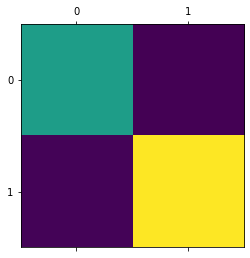

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

print('Confusion Matrix is')
print(confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.show()

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=df['Variety'].unique()))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        72
           1       0.96      0.95      0.95       122

    accuracy                           0.94       194
   macro avg       0.94      0.94      0.94       194
weighted avg       0.94      0.94      0.94       194



In [10]:
# Assigning features and label variables
weather=['Rainy','Rainy','Overcast','Sunny','Sunny','Sunny',
         'Overcast','Rainy','Rainy','Sunny','Rainy','Overcast',
         'Overcast','Sunny']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool'
      'Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [18]:
import pandas as pd
data= weather= ['Rainy','Rainy','Overcast','Sunny','Sunny','Sunny',
                   'Overcast','Rainy','Rainy','Sunny','Rainy','Overcast',
                   'Overcast','Sunny']
temp= ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
play= ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']
 
data= pd.DataFrame(data)
data

,0
0,Rainy
1,Rainy
2,Overcast
3,Sunny
4,Sunny
5,Sunny
6,Overcast
7,Rainy
8,Rainy
9,Sunny


In [19]:
# Converting string labels into numbers.
wheather_encoded=le.fit_transform(weather)
print (wheather_encoded)

[1 1 0 2 2 2 0 1 1 2 1 0 0 2]


In [20]:
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print ("Weather:",wheather_encoded)
print ("Temp:",temp_encoded)
print ("Play:",label)

Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [21]:
#Combinig weather and temp into single listof tuples
features=zip(wheather_encoded,temp_encoded)
features_ls= list(features)
print(features_ls)

[(1, 1), (1, 1), (0, 1), (2, 2), (2, 0), (2, 0), (0, 0), (1, 2), (1, 0), (2, 2), (1, 2), (0, 2), (0, 1), (2, 2)]


In [22]:
#Import Bernoulli Naive Bayes model
from sklearn.naive_bayes import GaussianNB, BernoulliNB

#Create a Bernoulli Classifier
model = BernoulliNB()

# Train the model using the training sets
model.fit(features_ls,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print ("Predicted Value:", predicted)

Predicted Value: [1]
